### GC ML Midterm Quiz, March 15 - Programming section

You have 12 questions; each of them is worth 5 points. Total time is 70 minutes and you can use anything you want (plagiarizing from the internet is still off-limits though, and please do not use chatGPT for this).

0: Please write your name here (but sorry no points for this one):
    
    GEHAN RANEPURA

In [153]:
#We do the imports for you to make it easier (you might not need everything, and you might use something else!)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier

### Part 1: Arrays and plotting

1\. Define an array that contains all the <b> odd </b> numbers between 0 and 40, without typing them in.

In [9]:
def odd(n):
    return np.array(range(1, n, 2))

A = odd(40)
print(A)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39]


2\. Define a function that takes a number x and calculates f(x) = x**4 - 3.

In [10]:
def y(x):
    return x**4 - 3

y(2)

13

3\. Check whether the function above works with vectors, and if not, vectorize it. Apply the function to the array you defined in 1. to obtain another array (e.g. if the array you created above is called a, you would define another array b = f(a), where f is the name of your function). 

In [16]:
B = y(A)
print(B)

[     -2      78     622    2398    6558   14638   28558   50622   83518
  130318  194478  279838  390622  531438  707278  923518 1185918 1500622
 1874158 2313438]


4\. Plot these two arrays in a scatter plot. Add labels to the axes with the name of your arrays.

Text(0, 0.5, 'Vector B (x**4 - 3)')

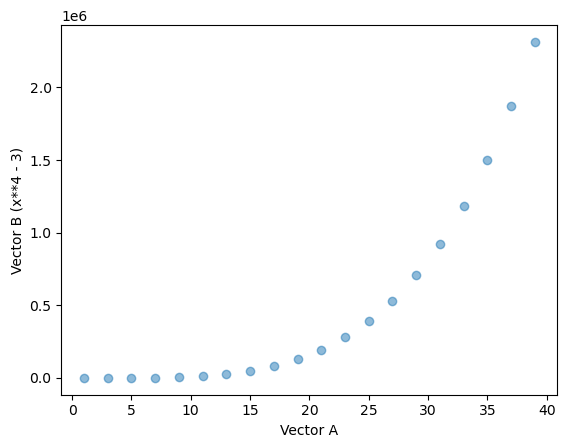

In [21]:
plt.scatter(A, B, alpha=.5)
plt.xlabel("Vector A")
plt.ylabel("Vector B (x**4 - 3)")

### Part 2: Working with data

We will work with a data set that contains data about women's health, where the target property is whether or not the someone had a caesarian section. The file that contains the data (both features and labels) is called caesarian.csv.

5\. Read the data from the file, and define the features array with the first five columns, and the labels array, with the last column. Hint: this is a comma-separated-value file.

In [51]:
import pandas as pd
df = pd.read_csv('caesarian.csv', sep = ',', names = ["Age", "B", "C", "D", "E", "C_section"])
df.head(100)

,Age,B,C,D,E,C_section
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


6\. How many instances are in your data set? How many features? 
## There are 80 instances
## There are 5 features

7\. How many positive instances (assuming the positive class has label = 1) are in your data set? Is the data set very imbalanced? (Let's assume that a data set is very imbalanced if one of the classes contains < 20% of the objects).

## There are 46 postive classes with label = 1

In [52]:
np.count_nonzero(df["C_section"])
print(df['C_section'].value_counts()[0])
print(df['C_section'].value_counts()[1])
print(np.sqrt(80))

34
46
8.94427190999916


8\. Choose an appropriate evaluation metric, based on the answer in Q7. For a decision tree classifier with default parameter values, report the average score of a 5-fold cross validation process, and the standard deviation of the scores vector.

In [81]:
LearningSet = df
TrainSet = LearningSet.iloc[:60,:] 
TestSet  = LearningSet.iloc[60:,:]
Xtrain = TrainSet.drop(["C_section"],axis=1)
Xtest  = TestSet.drop(["C_section"],axis=1)
ytrain = TrainSet.C_section
ytest  = TestSet.C_section

In [84]:
model = DecisionTreeClassifier(random_state = 5) # This is how we specify which method we'd like to use, and any parameters.
model.fit(Xtrain, ytrain)                        # This tiny line is how we build models in sklearn.
#plt.figure(figsize=(40,20))  # customize according to the size of your tree
#tree.plot_tree(model, feature_names = ['Stellar Mass (M*)', 'Orbital Period (d)', 'Distance (AU)'], class_names = ['Not Habitable','Habitable'])
plt.show()

ypred_train = model.predict(Xtrain)
print("DTtrain_score_60-20 -->", metrics.accuracy_score(ytrain, ypred_train))
ypred_test = model.predict(Xtest)
print("DTtest_score_60-20  -->", metrics.accuracy_score(ytest, ypred_test))

DTtrain_score_60-20 --> 0.9833333333333333
DTtest_score_60-20  --> 0.55


9\. Figure out (and explain) if your decision tree classifier is suffering from high bias or high variance.

### There seems to be high variance because the test score and train score are far apart.

In [102]:
features = LearningSet.drop(["C_section"],axis=1)
targets =  LearningSet["C_section"]
plot_learning_curve(model, 'Generalized Learning Curves', features, targets, train_sizes = np.array([0.05,0.1,0.2,0.5,1.0]), cv = KFold(n_splits=5, shuffle=True))

TypeError: plot_learning_curve() got an unexpected keyword argument 'cv'

10\. Use a SVM  classifier with default parameter values and report the average test scores for a 5-fold cross validation, and the standard deviation of the scores vector. Between the DT and the SVM, which model would you pick and why?

### I would choose Decision Trees because this is a binary classication problem where the data shows a similar of people with C_sections with those that do not.

In [138]:
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

bmodel = LinearSVC(dual = False) #Prefer dual=Falsewhen n_samples > n_features. If not, will not converge!!
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101) 

features = LearningSet.drop(["C_section"],axis=1)
targets =  LearningSet["C_section"]
score = cross_validate(bmodel, features, targets, cv = cv, scoring = 'accuracy', return_train_score=True)
print("Score = {:.3f}".format(score['test_score'].mean()), "StDev = {:.3f}".format(score['test_score'].std()))

Score = 0.625 StDev = 0.143


11\. Use the function cross_val_predict to derive the predicted labels for your data set (you can use either model, the tree or the SVM), and print (or plot, but printing is sufficient!) the confusion matrix.

In [147]:
cv1 = KFold(n_splits = 5)
model1 = DecisionTreeClassifier(random_state = 5)
y1 = cross_val_predict(model1, features, targets, cv = cv1) #these are the predictions!

In [148]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(7,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[21 13]
 [15 31]]


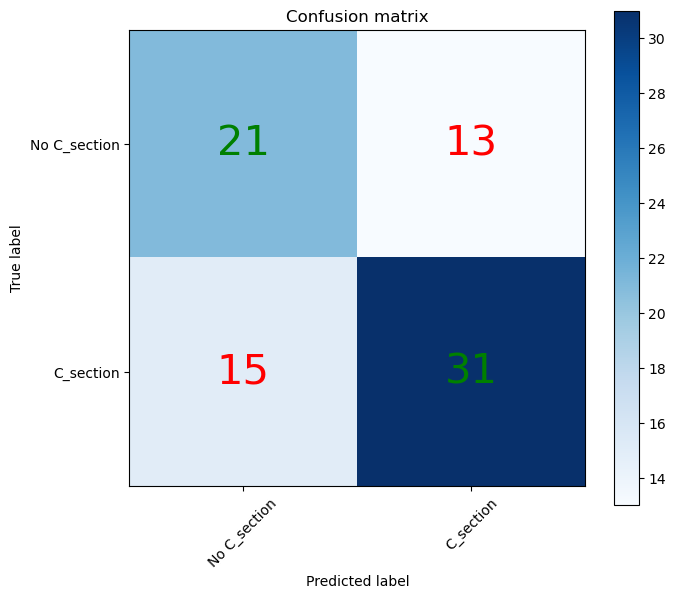

In [146]:
cm = metrics.confusion_matrix(y1,model.predict(features))

#cm
plot_confusion_matrix(cm, ['No C_section','C_section'], cmap = plt.cm.Blues)

12\. Play with one or two parameters of the SVM classifier to see if you can improve performance (note: we are not asking to do nested cross validation, just to attempt changing/optimizing parameters).

In [149]:
# Use C = 1
bmodel_1 = LinearSVC(dual = False, C = 1) #Prefer dual=Falsewhen n_samples > n_features. If not, will not converge!!
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101) 

features = LearningSet.drop(["C_section"],axis=1)
targets =  LearningSet["C_section"]
score = cross_validate(bmodel_1, features, targets, cv = cv, scoring = 'accuracy', return_train_score=True)
print("Score_C=10 = {:.3f}".format(score['test_score'].mean()), "StDev_C=10 = {:.3f}".format(score['test_score'].std()))

Score_C=10 = 0.625 StDev_C=10 = 0.143


In [151]:
# Use C = 5
bmodel_5 = LinearSVC(dual = False, C = 5) #Prefer dual=Falsewhen n_samples > n_features. If not, will not converge!!
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=101) 

features = LearningSet.drop(["C_section"],axis=1)
targets =  LearningSet["C_section"]
score = cross_validate(bmodel_5, features, targets, cv = cv, scoring = 'accuracy', return_train_score=True)
print("Score_C=100 = {:.3f}".format(score['test_score'].mean()), "StDev_C=100 = {:.3f}".format(score['test_score'].std()))

Score_C=100 = 0.637 StDev_C=100 = 0.155


EC: Do you think your data set needs scaling? Why or why not?
### For Decision Trees we do not scaling but for SVMs we need scaling because our test scores are not that great.

EC2: Based on your answer for Q8, do you think that limiting the maximum depth of the Decision Tree classifier would help? Why or why not?

### Yes, because there is a large variations in the elements of the confusion marix. Therefore using a simpler alogrithm would be better to classify if there is C_section or not.